# QTW - Assignment 5 - Working with Missing Data

**Utilizing the California Housing dataset**

# Setup

In [157]:
# Import package dependencies
import pandas as pd
import numpy as np
import statistics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from ml_metrics import rmse
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sn
from IPython.display import display, HTML


from pandas.plotting import scatter_matrix 


# Load dataset

In [158]:
# Load in the dataset
california = datasets.fetch_california_housing()
print(california.data.shape)

(20640, 8)


In [159]:
print(california.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])


In [160]:
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [161]:
california.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [162]:
# Convert the matrix to pandas
cal = pd.DataFrame(california.data)
cal.columns = california.feature_names
cal['MedInc'] = california.target
cal.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,4.526,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,3.585,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,3.521,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,3.413,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.422,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


# Exploratory Data Analysis

In [163]:
cal.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,2.068558,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.153956,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.149990,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,1.196000,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,1.797000,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,2.647250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,5.000010,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [164]:
cal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


array([[<AxesSubplot:title={'center':'MedInc'}>,
        <AxesSubplot:title={'center':'HouseAge'}>,
        <AxesSubplot:title={'center':'AveRooms'}>],
       [<AxesSubplot:title={'center':'AveBedrms'}>,
        <AxesSubplot:title={'center':'Population'}>,
        <AxesSubplot:title={'center':'AveOccup'}>],
       [<AxesSubplot:title={'center':'Latitude'}>,
        <AxesSubplot:title={'center':'Longitude'}>, <AxesSubplot:>]],
      dtype=object)

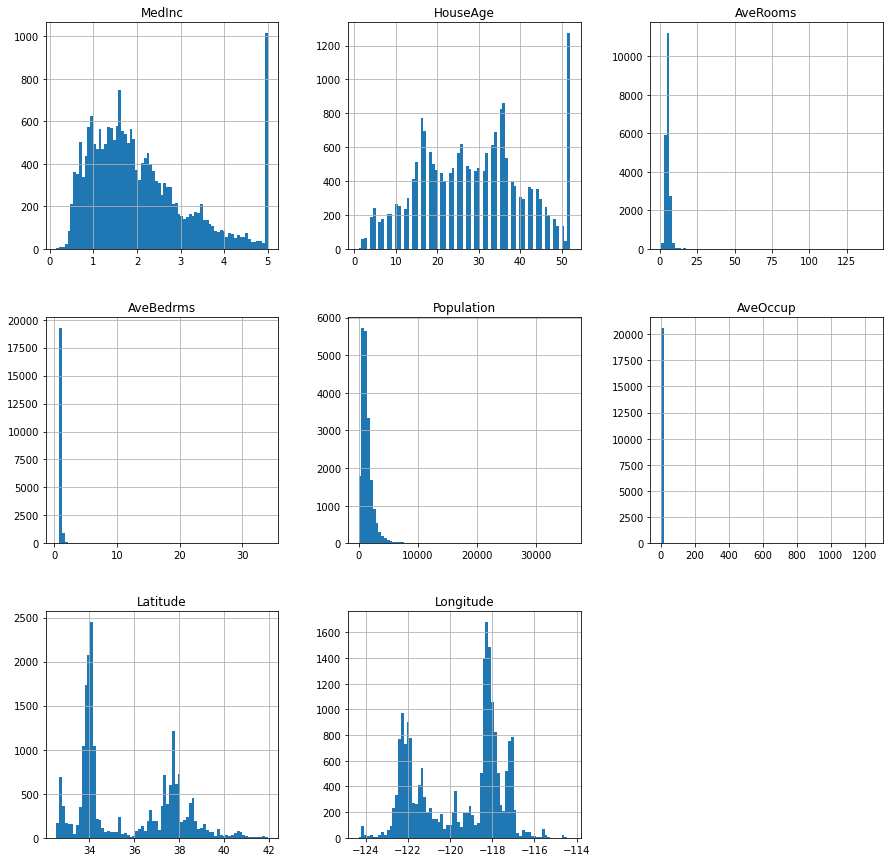

In [165]:
cal.hist(bins=75, figsize=(15,15))


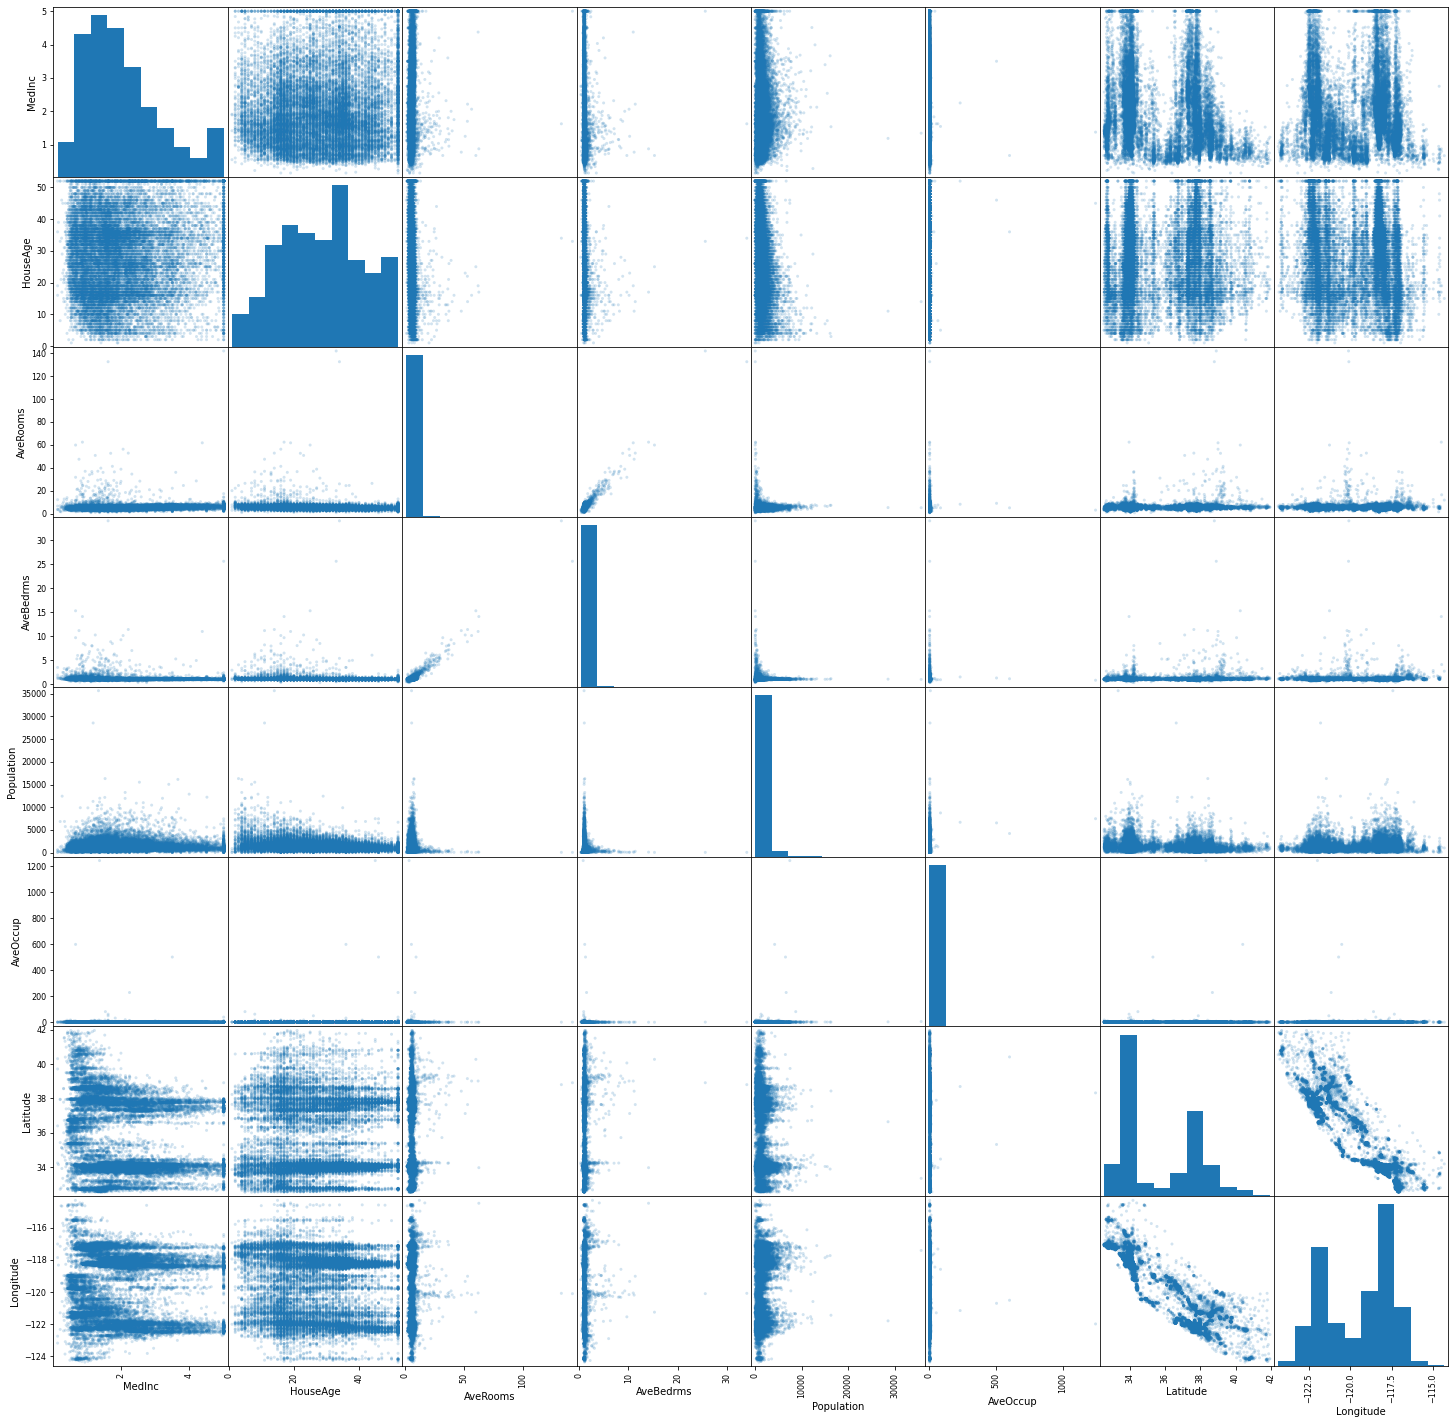

In [166]:
scatter_matrix(cal, alpha=0.2, figsize=(25, 25))
plt.show()

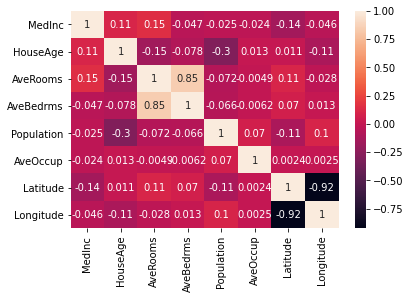

In [167]:
corrMatrix = cal.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [168]:
cal.corr()['MedInc'].sort_values(ascending=False)

MedInc        1.000000
AveRooms      0.151948
HouseAge      0.105623
AveOccup     -0.023737
Population   -0.024650
Longitude    -0.045967
AveBedrms    -0.046701
Latitude     -0.144160
Name: MedInc, dtype: float64

# Functions

In [169]:
def get_train_test_matrix(train_set,test_set):
    # Converting the training and testing datasets back to matrix-formats
    X_train = train_set.iloc[:, 1:].values # returns the data; excluding the target
    Y_train = train_set.iloc[:, 0].values # returns the target-only
    X_test = test_set.iloc[:, 1:].values # ""
    Y_test = test_set.iloc[:, 0].values # ""
    return X_train,Y_train,X_test,Y_test

In [170]:
def get_train_test_split(inputDF,split_fraction=0.7):
    # Create training and testing sets (cross-validation not needed)
    train_set = inputDF.sample(frac=split_fraction, random_state=100)
    test_set = inputDF[~inputDF.isin(train_set)].dropna()
    #print(train_set.shape[0])
    #print(test_set.shape[0])
    return train_set,test_set

In [171]:
def get_row_indices(train_set,test_set):
    # Get the training and testing row indices for later use
    train_index = train_set.index.values.astype(int)
    test_index = test_set.index.values.astype(int)
    return train_index,test_index

In [172]:
def get_LR_model(X_train,Y_train):
    # Fit a linear regression to the training data
    reg = LinearRegression(normalize=True).fit(X_train, Y_train)
    print("Regression Score : ",reg.score(X_train, Y_train)) #Return the coefficient of determination R^2 of the prediction.
    print("Estimated coefficients of regression : ",reg.coef_)
    print("Regression intercept : ",reg.intercept_)
    print("Parameters for the esitmator : ",reg.get_params())
    return reg

In [173]:
def print_model_params(reg,df):
    # Find the variable with the largest "normalized" coefficient value
    print('The positive(max) coef-value is {}'.format(max(reg.coef_))) # Positive Max
    #print('The abs(max) coef-value is {}'.format(max(reg.coef_, key=abs))) # ABS Max
    max_var = max(reg.coef_) # Positive Max
    #max_var = max(reg.coef_, key=abs) # ABS Max
    var_index = reg.coef_.tolist().index(max_var)
    print('The variable associated with this coef-value is {}'.format(df.columns[var_index+1]))
    

In [174]:
def get_printStr(feature,coeff):
    s=[]
    for i in range(len(feature)):
        s.append(feature[i]+" : "+str(coeff[i]))
    s1 = " ".join(s)
    return s1
#get_printStr(["a","b","c","d"],[1.0,2.3,3.0,4.4])   

In [175]:
def get_all_error_calc(model,X_test,Y_test,colNames):
    result = {}
    Y_pred = model.predict(X_test)
    mae = mean_absolute_error(Y_test,Y_pred)
    mse = mean_squared_error(Y_test,Y_pred)
    rmse_val = rmse(Y_test,Y_pred)
    r2 = r2_score(Y_test,Y_pred)
    coeff = model.coef_.tolist()
    intercept = model.intercept_
    feature = colNames[1:]
    result["mae"]=mae
    result["mse"]=mse
    result["rmse_val"]=rmse_val
    result["r2"]=r2
    coeff_feat_df=pd.DataFrame({"Feature":feature,"Coefficients":coeff})
    result["co_efficient_feature_df"] = display(HTML(coeff_feat_df.to_html()))
    cf_list = list(zip(feature,np.round_(coeff, decimals = 4)))
    cf_str = get_printStr(feature,np.round_(coeff, decimals = 3))
    result["co_efficient_feature"]= cf_str #'\n'.join(map(str, cf_list)) #print(*cf_list, sep = "\n")
    #result["features"] = feature
    result["intercept"]=intercept
    for k, v in result.items():
      print(k, v)
    #print("MAE: %.3f"%mae)
    #print("MSE:  %.3f"%mse)
    #print("RMSE:  %.3f"%rmse_val)
    #print("R2:  %.3f"%r2)
    #print("coefficients {0}".format(coeff))
    #print("features {0}".format(feature))
    #print("intercept {0}".format(intercept))
    return result

In [176]:
def run_all_model(imputed_df_dict,df):
    ## Get the dictionay with imputed df (Imputing HouseAge with median)
    model_result = {}
    for k in imputed_df_dict:
        imputed_df = imputed_df_dict[k]
        keyVal=["",0]
        if k==0.0:
            train_set,test_set = get_train_test_split(imputed_df)
            train_index,test_index = get_row_indices(train_set,test_set)
        else:
            train_set = imputed_df.iloc[train_index]
            test_set = imputed_df.iloc[test_index]
            keyVal = k.split("-")
        printString = "Handling data with {}% imputation".format(int(float(keyVal[1])*100))
        print("\n"+printString)
        print("-"*len(printString))
        X_train,Y_train,X_test,Y_test = get_train_test_matrix(train_set,test_set)
        model = get_LR_model(X_train,Y_train)
        print_model_params(model,df)
        result = get_all_error_calc(model,X_test,Y_test,df.columns.tolist())
        model_result[k] = result
    return model_result


In [185]:
def get_model_result_df(model_result):
    cols = ["data_imputation_percent","missing_type","mae","mse","rmse","r2","mae_diff","mse_diff","rmse_diff","r2_diff","features_coefficient","intercept"]
    df_index = range(len(model_result))
    result_df = pd.DataFrame(columns=cols, index=df_index)
    indx=0
    base_mae = base_mse = base_rmse_val = base_r2 = mae_diff = mse_diff = rmse_diff = r2_diff = 0
    for k in model_result:
        result = model_result[k]
        coeff_features = intercept = data = imputation=""
        mae = result["mae"]
        mse = result["mse"]
        rmse_val = result["rmse_val"]
        r2 = result["r2"]
        coeff_features = result["co_efficient_feature"]
        intercept = result["intercept"]
        keyVal=["",0]
        if k==0.0:
            data = "Original (0%)"
            imputation="None"
            base_mae = mae
            base_mse=mse
            base_rmse_val=rmse_val
            base_r2=r2
            mae_diff = np.nan
            mse_diff = np.nan
            rmse_diff = np.nan
            r2_diff = np.nan
        else:
            keyVal = k.split("-")
            data= str(int(float(keyVal[1])*100))+"%"
            imputation=keyVal[0]
            mae_diff = mae-base_mae
            mse_diff = mse-base_mse
            rmse_diff = rmse_val-base_rmse_val
            r2_diff = r2-base_r2
        result_df.loc[indx].data_imputation_percent = data
        result_df.loc[indx].missing_type = imputation
        result_df.loc[indx].mae = round(mae,3)
        result_df.loc[indx].mse = round(mse,3)
        result_df.loc[indx].rmse = round(rmse_val,3)
        result_df.loc[indx].r2 = round(r2,3)
        result_df.loc[indx].mae_diff = round(mae_diff,3)
        result_df.loc[indx].mse_diff = round(mse_diff,3)
        result_df.loc[indx].rmse_diff = round(rmse_diff,3)
        result_df.loc[indx].r2_diff = round(r2_diff,3)
        result_df.loc[indx].features_coefficient = coeff_features
        result_df.loc[indx].intercept = round(intercept,3)
        
        #pd.DataFrame({"Feature":X_train.columns.tolist(),"Coefficients":logreg.coef_[0]})
        indx=indx+1        
    return result_df
    

# Case 1 - Missing completely at Random (MCAR)

In [191]:
#case 1 - Missing completely at Random
def get_mcar_imputed_df(impute_fractions,housing_df,impute_variable,impute_with="median"):
    imputed_df = {}
    for percent in impute_fractions:
        print("Percentage Imputed : {}%".format(int(percent*100)))
        if percent == 0.0:
            #Run Baseline model
            imputed_df[percent] = housing_df
            #imputed_df.append(housing_df)
        else:
            in_sample = housing_df.sample(frac=percent, random_state=100)
            print("Imputed sample shape : {}".format(in_sample.shape))
            out_sample = housing_df[~housing_df.isin(in_sample)].dropna()
            print("Un Imputed sample shape : {}".format(out_sample.shape))
            #print("Un imputed sample shape : {}".format(out_sample.shape))
            #print("Mean",np.mean(housing_df[impute_variable]))
            #print("Median",np.median(housing_df[impute_variable]))
            #print("Std.Dev",statistics.stdev(housing_df[impute_variable]))            
            
            in_sample[impute_variable] = np.nan
            fill_value = 0
            if(impute_with == "median"):
                fill_value = out_sample[impute_variable].median()
                in_sample[impute_variable] = in_sample[impute_variable].fillna(fill_value)
            if(impute_with == "mean"):
                fill_value = out_sample[impute_variable].mean()
                in_sample[impute_variable] = in_sample[impute_variable].fillna(fill_value)
            print("Imputed value ",fill_value)
            imputed_data = pd.concat([in_sample, out_sample])
            print("Imputed sample shape : {}".format(imputed_data.shape))
            #print("Mean",np.mean(imputed_data[impute_variable]))
            #print("Median",np.median(imputed_data[impute_variable]))
            #print("Std.Dev",statistics.stdev(imputed_data[impute_variable]))  
            
            imputed_data = imputed_data.sort_index()
            imputed_df["MCAR-"+str(percent)] = imputed_data
            #imputed_df.append(imputed_data)
    return imputed_df

In [192]:
#Evaluating Case 1 - MIssing completely at random
mcar_impute_fraction_list = [0.0,0.01,0.05,0.1,0.2,0.33,0.5]
cols = ["AveBedrms"]#cal.columns[1:]
#imputed_df_dict = {}
results = pd.DataFrame()
for c in cols:
    imputed_df_dict = get_mcar_imputed_df(mcar_impute_fraction_list,cal,c,"median")
    model_result = run_all_model(imputed_df_dict,cal)
    model_result_df = get_model_result_df(model_result)  
    model_result_df['Imputed_columnName'] = c
    results = results.append(model_result_df)

#todo - add coeeff for each var


Percentage Imputed : 0%
Percentage Imputed : 1%
Imputed sample shape : (206, 8)
Un Imputed sample shape : (20434, 8)
Imputed value  1.048780487804878
Imputed sample shape : (20640, 8)
Percentage Imputed : 5%
Imputed sample shape : (1032, 8)
Un Imputed sample shape : (19608, 8)
Imputed value  1.0488485720778729
Imputed sample shape : (20640, 8)
Percentage Imputed : 10%
Imputed sample shape : (2064, 8)
Un Imputed sample shape : (18576, 8)
Imputed value  1.0492558095378741
Imputed sample shape : (20640, 8)
Percentage Imputed : 20%
Imputed sample shape : (4128, 8)
Un Imputed sample shape : (16512, 8)
Imputed value  1.0491803278688525
Imputed sample shape : (20640, 8)
Percentage Imputed : 33%
Imputed sample shape : (6811, 8)
Un Imputed sample shape : (13829, 8)
Imputed value  1.049792531120332
Imputed sample shape : (20640, 8)
Percentage Imputed : 50%
Imputed sample shape : (10320, 8)
Un Imputed sample shape : (10320, 8)
Imputed value  1.049390957490646
Imputed sample shape : (20640, 8)

Ha

,Feature,Coefficients
0,HouseAge,0.005394
1,AveRooms,0.364187
2,AveBedrms,-1.381296
3,Population,-0.000012
4,AveOccup,-0.001248
5,Latitude,-0.730902
6,Longitude,-0.723705


mae 0.678032824552321
mse 0.8082703428884797
rmse_val 0.8990385658515877
r2 0.39003766493623837
co_efficient_feature_df None
co_efficient_feature HouseAge : 0.005 AveRooms : 0.364 AveBedrms : -1.381 Population : -0.0 AveOccup : -0.001 Latitude : -0.731 Longitude : -0.724
intercept -59.014861272508455

Handling data with 1% imputation
--------------------------------
Regression Score :  0.3834293533184935
Estimated coefficients of regression :  [ 4.47096999e-03  3.17888393e-01 -1.17920535e+00 -1.46831934e-05
 -1.20526961e-03 -7.36913647e-01 -7.31598564e-01]
Regression intercept :  -59.6864456964893
Parameters for the esitmator :  {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': True}
The positive(max) coef-value is 0.31788839331251983
The variable associated with this coef-value is AveRooms


,Feature,Coefficients
0,HouseAge,0.004471
1,AveRooms,0.317888
2,AveBedrms,-1.179205
3,Population,-0.000015
4,AveOccup,-0.001205
5,Latitude,-0.736914
6,Longitude,-0.731599


mae 0.6789545945206058
mse 0.8044361662050437
rmse_val 0.8969036549178756
r2 0.3929311316871251
co_efficient_feature_df None
co_efficient_feature HouseAge : 0.004 AveRooms : 0.318 AveBedrms : -1.179 Population : -0.0 AveOccup : -0.001 Latitude : -0.737 Longitude : -0.732
intercept -59.6864456964893

Handling data with 5% imputation
--------------------------------
Regression Score :  0.3635746502071524
Estimated coefficients of regression :  [ 3.67873527e-03  2.68263312e-01 -9.58633277e-01 -1.61975718e-05
 -1.14496694e-03 -7.46859319e-01 -7.45435822e-01]
Regression intercept :  -60.93834995598618
Parameters for the esitmator :  {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': True}
The positive(max) coef-value is 0.268263312326713
The variable associated with this coef-value is AveRooms


,Feature,Coefficients
0,HouseAge,0.003679
1,AveRooms,0.268263
2,AveBedrms,-0.958633
3,Population,-0.000016
4,AveOccup,-0.001145
5,Latitude,-0.746859
6,Longitude,-0.745436


mae 0.6833996799173918
mse 0.8096166910066835
rmse_val 0.8997870253602702
r2 0.3890216414618973
co_efficient_feature_df None
co_efficient_feature HouseAge : 0.004 AveRooms : 0.268 AveBedrms : -0.959 Population : -0.0 AveOccup : -0.001 Latitude : -0.747 Longitude : -0.745
intercept -60.93834995598618

Handling data with 10% imputation
---------------------------------
Regression Score :  0.3601112825002488
Estimated coefficients of regression :  [ 3.64489916e-03  2.58323355e-01 -9.13502893e-01 -1.57215498e-05
 -1.17726906e-03 -7.51382231e-01 -7.49919195e-01]
Regression intercept :  -61.310314097504445
Parameters for the esitmator :  {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': True}
The positive(max) coef-value is 0.25832335525924105
The variable associated with this coef-value is AveRooms


,Feature,Coefficients
0,HouseAge,0.003645
1,AveRooms,0.258323
2,AveBedrms,-0.913503
3,Population,-0.000016
4,AveOccup,-0.001177
5,Latitude,-0.751382
6,Longitude,-0.749919


mae 0.6847687473270112
mse 0.8119513035148301
rmse_val 0.9010834054152979
r2 0.38725982289529104
co_efficient_feature_df None
co_efficient_feature HouseAge : 0.004 AveRooms : 0.258 AveBedrms : -0.914 Population : -0.0 AveOccup : -0.001 Latitude : -0.751 Longitude : -0.75
intercept -61.310314097504445

Handling data with 20% imputation
---------------------------------
Regression Score :  0.3484599239483177
Estimated coefficients of regression :  [ 3.20363086e-03  2.25966274e-01 -7.42346031e-01 -1.67421379e-05
 -1.12971553e-03 -7.58780769e-01 -7.59179774e-01]
Regression intercept :  -62.15494381632978
Parameters for the esitmator :  {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': True}
The positive(max) coef-value is 0.22596627383027854
The variable associated with this coef-value is AveRooms


,Feature,Coefficients
0,HouseAge,0.003204
1,AveRooms,0.225966
2,AveBedrms,-0.742346
3,Population,-0.000017
4,AveOccup,-0.001130
5,Latitude,-0.758781
6,Longitude,-0.759180


mae 0.6903627561271287
mse 0.8244530932300194
rmse_val 0.9079939940495307
r2 0.37782532995088636
co_efficient_feature_df None
co_efficient_feature HouseAge : 0.003 AveRooms : 0.226 AveBedrms : -0.742 Population : -0.0 AveOccup : -0.001 Latitude : -0.759 Longitude : -0.759
intercept -62.15494381632978

Handling data with 33% imputation
---------------------------------
Regression Score :  0.34073634329616564
Estimated coefficients of regression :  [ 2.98870644e-03  2.02899030e-01 -6.55433197e-01 -1.57219424e-05
 -1.13833201e-03 -7.67921888e-01 -7.69900407e-01]
Regression intercept :  -63.08064220074559
Parameters for the esitmator :  {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': True}
The positive(max) coef-value is 0.20289902965276516
The variable associated with this coef-value is AveRooms


,Feature,Coefficients
0,HouseAge,0.002989
1,AveRooms,0.202899
2,AveBedrms,-0.655433
3,Population,-0.000016
4,AveOccup,-0.001138
5,Latitude,-0.767922
6,Longitude,-0.769900


mae 0.6949475162874661
mse 0.8325437200406556
rmse_val 0.9124383376648832
r2 0.37171972720922286
co_efficient_feature_df None
co_efficient_feature HouseAge : 0.003 AveRooms : 0.203 AveBedrms : -0.655 Population : -0.0 AveOccup : -0.001 Latitude : -0.768 Longitude : -0.77
intercept -63.08064220074559

Handling data with 50% imputation
---------------------------------
Regression Score :  0.3371263415410476
Estimated coefficients of regression :  [ 2.99727301e-03  1.90977120e-01 -6.63818984e-01 -1.44316081e-05
 -1.13484496e-03 -7.74878537e-01 -7.77416419e-01]
Regression intercept :  -63.666484259907065
Parameters for the esitmator :  {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': True}
The positive(max) coef-value is 0.19097711984241372
The variable associated with this coef-value is AveRooms


,Feature,Coefficients
0,HouseAge,0.002997
1,AveRooms,0.190977
2,AveBedrms,-0.663819
3,Population,-0.000014
4,AveOccup,-0.001135
5,Latitude,-0.774879
6,Longitude,-0.777416


mae 0.6970374684121459
mse 0.8347808018444229
rmse_val 0.913663396357993
r2 0.3700315103239191
co_efficient_feature_df None
co_efficient_feature HouseAge : 0.003 AveRooms : 0.191 AveBedrms : -0.664 Population : -0.0 AveOccup : -0.001 Latitude : -0.775 Longitude : -0.777
intercept -63.666484259907065


In [187]:
HTML(results.to_html(classes= 'table table-striped table-hover'))

,data_imputation_percent,missing_type,mae,mse,rmse,r2,mae_diff,mse_diff,rmse_diff,r2_diff,features_coefficient,intercept,Imputed_columnName
0,Original (0%),None,0.678,0.808,0.899,0.39,NaN,NaN,NaN,NaN,HouseAge : 0.005 AveRooms : 0.364 AveBedrms : -1.381 Population : -0.0 AveOccup : -0.001 Latitude : -0.731 Longitude : -0.724,-59.015,AveBedrms
1,1%,MCAR,0.679,0.804,0.897,0.393,0.001,-0.004,-0.002,0.003,HouseAge : 0.004 AveRooms : 0.318 AveBedrms : -1.179 Population : -0.0 AveOccup : -0.001 Latitude : -0.737 Longitude : -0.732,-59.686,AveBedrms
2,5%,MCAR,0.683,0.81,0.9,0.389,0.005,0.001,0.001,-0.001,HouseAge : 0.004 AveRooms : 0.268 AveBedrms : -0.959 Population : -0.0 AveOccup : -0.001 Latitude : -0.747 Longitude : -0.745,-60.938,AveBedrms
3,10%,MCAR,0.685,0.812,0.901,0.387,0.007,0.004,0.002,-0.003,HouseAge : 0.004 AveRooms : 0.258 AveBedrms : -0.914 Population : -0.0 AveOccup : -0.001 Latitude : -0.751 Longitude : -0.75,-61.31,AveBedrms
4,20%,MCAR,0.69,0.824,0.908,0.378,0.012,0.016,0.009,-0.012,HouseAge : 0.003 AveRooms : 0.226 AveBedrms : -0.742 Population : -0.0 AveOccup : -0.001 Latitude : -0.759 Longitude : -0.759,-62.155,AveBedrms
5,33%,MCAR,0.695,0.833,0.912,0.372,0.017,0.024,0.013,-0.018,HouseAge : 0.003 AveRooms : 0.203 AveBedrms : -0.655 Population : -0.0 AveOccup : -0.001 Latitude : -0.768 Longitude : -0.77,-63.081,AveBedrms
6,50%,MCAR,0.697,0.835,0.914,0.37,0.019,0.027,0.015,-0.02,HouseAge : 0.003 AveRooms : 0.191 AveBedrms : -0.664 Population : -0.0 AveOccup : -0.001 Latitude : -0.775 Longitude : -0.777,-63.666,AveBedrms


# Case 2 : Mossing at Random (MAR)

In [188]:
#Case2 : if z > 30 then impute x - Missing at Random
def get_mar_imputed_df(impute_fractions,housing_df,impute_variable,reference_variable,ref_variable_threshold,impute_with="median"):
    imputed_df = {}
    for percent in impute_fractions:
        print("Percentage Imputed : {}%".format(int(percent*100)))
        if percent == 0.0:
            #Run Baseline model
            imputed_df[percent] = housing_df
            #imputed_df.append(housing_df)
        else:
            print("Imputing variable {0} when ever variable {1} is > {2}".format(impute_variable,reference_variable,ref_variable_threshold))
            housing_df_sub = housing_df[housing_df[reference_variable] > ref_variable_threshold]   
            print("Sub dataframe shape where variable {0} is > {1}".format(reference_variable,ref_variable_threshold))
            print(housing_df_sub.shape)
            in_sample = housing_df_sub.sample(frac=percent, random_state=100)
            print("Imputed sample shape : {}".format(in_sample.shape))
            out_sample = housing_df[~housing_df.isin(in_sample)].dropna()
            print("Un imputed sample shape : {}".format(out_sample.shape))
            in_sample[impute_variable] = np.nan
            fill_value = 0
            if(impute_with == "median"):
                fill_value = out_sample[impute_variable].median()
                in_sample[impute_variable] = in_sample[impute_variable].fillna(fill_value)
            if(impute_with == "mean"):
                fill_value = out_sample[impute_variable].mean()
                in_sample[impute_variable] = in_sample[impute_variable].fillna(fill_value)
            if(impute_with == "zero"):
                in_sample[impute_variable] = in_sample[impute_variable].fillna(0)
            print("Imputed value ",fill_value)
            imputed_data = pd.concat([in_sample, out_sample])
            imputed_data = imputed_data.sort_index()
            print("Final Imputed Data : {}".format(imputed_data.shape))
            imputed_df["MAR-"+str(percent)] = imputed_data
            #imputed_df.append(imputed_data)
    return imputed_df

In [189]:
#Evaluating Case 2 - Missing at random
mar_impute_fraction_list = [0.0,0.1,0.2,0.3]
mar_imputed_df_dict = get_mar_imputed_df(mar_impute_fraction_list,cal,'AveBedrms','AveRooms',3,"median")#'AveBedrms','AveRooms',4,
model_result = run_all_model(mar_imputed_df_dict,cal)
model_result_df = get_model_result_df(model_result)  
#display(model_result_df)


Percentage Imputed : 0%
Percentage Imputed : 10%
Imputing variable AveBedrms when ever variable AveRooms is > 3
Sub dataframe shape where variable AveRooms is > 3
(20185, 8)
Imputed sample shape : (2018, 8)
Un imputed sample shape : (18622, 8)
Imputed value  1.0487096237096236
Final Imputed Data : (20640, 8)
Percentage Imputed : 20%
Imputing variable AveBedrms when ever variable AveRooms is > 3
Sub dataframe shape where variable AveRooms is > 3
(20185, 8)
Imputed sample shape : (4037, 8)
Un imputed sample shape : (16603, 8)
Imputed value  1.048951048951049
Final Imputed Data : (20640, 8)
Percentage Imputed : 30%
Imputing variable AveBedrms when ever variable AveRooms is > 3
Sub dataframe shape where variable AveRooms is > 3
(20185, 8)
Imputed sample shape : (6056, 8)
Un imputed sample shape : (14584, 8)
Imputed value  1.0485732957726372
Final Imputed Data : (20640, 8)

Handling data with 0% imputation
--------------------------------
Regression Score :  0.4021408992488681
Estimated coe

,Feature,Coefficients
0,HouseAge,0.005394
1,AveRooms,0.364187
2,AveBedrms,-1.381296
3,Population,-0.000012
4,AveOccup,-0.001248
5,Latitude,-0.730902
6,Longitude,-0.723705


mae 0.678032824552321
mse 0.8082703428884797
rmse_val 0.8990385658515877
r2 0.39003766493623837
co_efficient_feature_df None
co_efficient_feature HouseAge : 0.005 AveRooms : 0.364 AveBedrms : -1.381 Population : -0.0 AveOccup : -0.001 Latitude : -0.731 Longitude : -0.724
intercept -59.014861272508455

Handling data with 10% imputation
---------------------------------
Regression Score :  0.3832103711667604
Estimated coefficients of regression :  [ 4.69740240e-03  3.14399664e-01 -1.14658937e+00 -1.21187567e-05
 -1.20421882e-03 -7.44842083e-01 -7.40519554e-01]
Regression intercept :  -60.500851161089415
Parameters for the esitmator :  {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': True}
The positive(max) coef-value is 0.3143996641291375
The variable associated with this coef-value is AveRooms


,Feature,Coefficients
0,HouseAge,0.004697
1,AveRooms,0.314400
2,AveBedrms,-1.146589
3,Population,-0.000012
4,AveOccup,-0.001204
5,Latitude,-0.744842
6,Longitude,-0.740520


mae 0.6842521589593245
mse 0.8499146917894628
rmse_val 0.9219081796954959
r2 0.35861069929120737
co_efficient_feature_df None
co_efficient_feature HouseAge : 0.005 AveRooms : 0.314 AveBedrms : -1.147 Population : -0.0 AveOccup : -0.001 Latitude : -0.745 Longitude : -0.741
intercept -60.500851161089415

Handling data with 20% imputation
---------------------------------
Regression Score :  0.38082688396199427
Estimated coefficients of regression :  [ 4.74034521e-03  3.09278015e-01 -1.12474212e+00 -1.19636230e-05
 -1.05466494e-03 -7.49775964e-01 -7.45728030e-01]
Regression intercept :  -60.948254551762496
Parameters for the esitmator :  {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': True}
The positive(max) coef-value is 0.3092780154601371
The variable associated with this coef-value is AveRooms


,Feature,Coefficients
0,HouseAge,0.004740
1,AveRooms,0.309278
2,AveBedrms,-1.124742
3,Population,-0.000012
4,AveOccup,-0.001055
5,Latitude,-0.749776
6,Longitude,-0.745728


mae 0.6867045628963675
mse 0.8658171101448153
rmse_val 0.9304929393309845
r2 0.346609917227959
co_efficient_feature_df None
co_efficient_feature HouseAge : 0.005 AveRooms : 0.309 AveBedrms : -1.125 Population : -0.0 AveOccup : -0.001 Latitude : -0.75 Longitude : -0.746
intercept -60.948254551762496

Handling data with 30% imputation
---------------------------------
Regression Score :  0.36865004613154606
Estimated coefficients of regression :  [ 4.15394094e-03  2.74855620e-01 -9.66598055e-01 -1.33389973e-05
 -1.03825020e-03 -7.55381798e-01 -7.52968296e-01]
Regression intercept :  -61.58517190062545
Parameters for the esitmator :  {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': True}
The positive(max) coef-value is 0.27485562036693595
The variable associated with this coef-value is AveRooms


,Feature,Coefficients
0,HouseAge,0.004154
1,AveRooms,0.274856
2,AveBedrms,-0.966598
3,Population,-0.000013
4,AveOccup,-0.001038
5,Latitude,-0.755382
6,Longitude,-0.752968


mae 0.6929651341178028
mse 0.8760332937593536
rmse_val 0.935966502477174
r2 0.3389002600967884
co_efficient_feature_df None
co_efficient_feature HouseAge : 0.004 AveRooms : 0.275 AveBedrms : -0.967 Population : -0.0 AveOccup : -0.001 Latitude : -0.755 Longitude : -0.753
intercept -61.58517190062545


In [190]:
display(HTML(model_result_df.to_html()))

,data_imputation_percent,missing_type,mae,mse,rmse,r2,mae_diff,mse_diff,rmse_diff,r2_diff,features_coefficient,intercept
0,Original (0%),None,0.678,0.808,0.899,0.39,NaN,NaN,NaN,NaN,HouseAge : 0.005 AveRooms : 0.364 AveBedrms : -1.381 Population : -0.0 AveOccup : -0.001 Latitude : -0.731 Longitude : -0.724,-59.015
1,10%,MAR,0.684,0.85,0.922,0.359,0.006,0.042,0.023,-0.031,HouseAge : 0.005 AveRooms : 0.314 AveBedrms : -1.147 Population : -0.0 AveOccup : -0.001 Latitude : -0.745 Longitude : -0.741,-60.501
2,20%,MAR,0.687,0.866,0.93,0.347,0.009,0.058,0.031,-0.043,HouseAge : 0.005 AveRooms : 0.309 AveBedrms : -1.125 Population : -0.0 AveOccup : -0.001 Latitude : -0.75 Longitude : -0.746,-60.948
3,30%,MAR,0.693,0.876,0.936,0.339,0.015,0.068,0.037,-0.051,HouseAge : 0.004 AveRooms : 0.275 AveBedrms : -0.967 Population : -0.0 AveOccup : -0.001 Latitude : -0.755 Longitude : -0.753,-61.585


In [ ]:
#Case 3 : Impute 25 % of x -Missing not at random
def get_mnar_imputed_df(impute_fractions,housing_df,impute_variable,impute_with="median"):
    imputed_df = {}
    for percent in impute_fractions:
        print("Percentage Imputed : {}%".format(int(percent*100)))
        if percent == 0.0:
            #Run Baseline model
            imputed_df[percent] = housing_df
            #imputed_df.append(housing_df)
        else:
            var_threshold = np.quantile(housing_df[impute_variable],percent)
            print("Imputing variable {0} when < {1}".format(impute_variable,var_threshold))
            in_sample = housing_df[housing_df[impute_variable] < var_threshold]          
            print(in_sample.shape)
            
            #in_sample = housing_df_sub #housing_df_sub.sample(frac=percent, random_state=99)
            print("Imputed sample shape : {}".format(in_sample.shape))
            out_sample = housing_df[~housing_df.isin(in_sample)].dropna()
            print("Un imputed sample shape : {}".format(out_sample.shape))
            in_sample[impute_variable] = np.nan
            fill_value = 0
            if(impute_with == "median"):
                fill_value = out_sample[impute_variable].median()
                in_sample[impute_variable] = in_sample[impute_variable].fillna(fill_value)
            if(impute_with == "mean"):
                fill_value = out_sample[impute_variable].mean()
                in_sample[impute_variable] = in_sample[impute_variable].fillna(fill_value)
            if(impute_with == "zero"):
                in_sample[impute_variable] = in_sample[impute_variable].fillna(0)
            imputed_data = pd.concat([in_sample, out_sample])
            imputed_data = imputed_data.sort_index()
            imputed_df["mnar-"+str(percent)] = imputed_data
            #imputed_df.append(imputed_data)
    return imputed_df

In [ ]:
#Evaluating Case 3 - Missing Not at random
mnar_imputed_df_dict = get_mnar_imputed_df([0.0,0.25],cal,'AveBedrms',"median") #'AveBedrms','AveRooms',4,
model_result = run_all_model(mnar_imputed_df_dict,cal)
model_result_df3 = get_model_result_df(model_result)  
#display(model_result_df3)
    


In [ ]:
display(HTML(model_result_df3.to_html()))

In [ ]:
boxplot = cal.boxplot(by='AveRooms')
boxplot